In [ ]:
!pip install pydub


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wav
from pydub import AudioSegment
from pydub.playback import play
from google.colab import files
import io
from IPython.display import Audio

In [ ]:
#  Étape 1 : Importer un fichier audio
print(" Importer un fichier .wav de votre voix")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

#  Lire l'audio
fs, audio = wav.read(io.BytesIO(uploaded[filename]))  # Charger le fichier wav
audio = audio.astype(float)  # Convertir en float

#  Convertir en mono si le fichier est stéréo
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

#  Normaliser le signal
audio = audio / np.max(np.abs(audio))

#  Temps du signal
duration = len(audio) / fs
time = np.linspace(0, duration, len(audio))

#  Écouter le signal original
print(" Écouter le signal original")
display(Audio(audio, rate=fs))

📥 Importer un fichier .wav de votre voix


Saving TP TSG 1.wav to TP TSG 1 (1).wav
🎧 Écouter le signal original


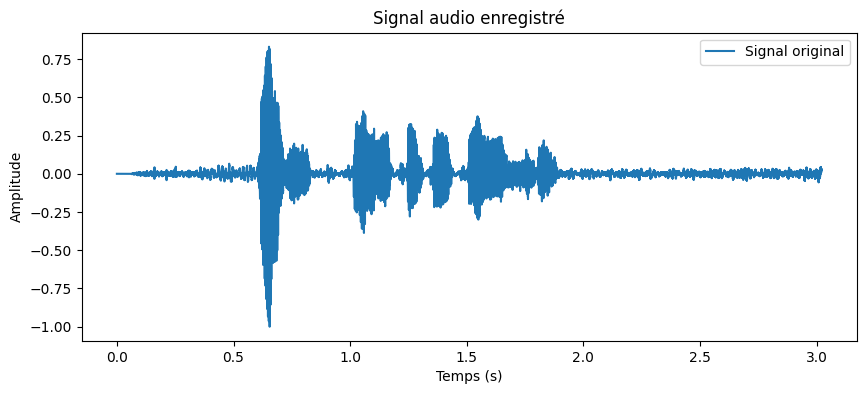

In [ ]:
#  Étape 2 : Afficher le signal temporel
plt.figure(figsize=(10, 4))
plt.plot(time, audio, label="Signal original")
plt.title("Signal audio enregistré")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

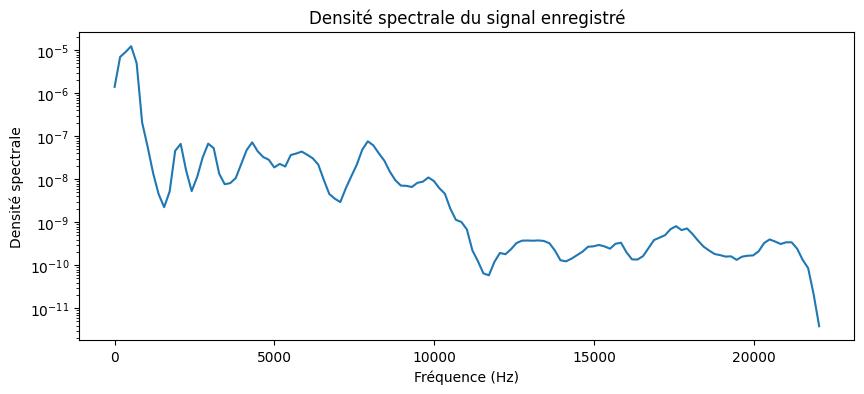

In [ ]:
#  Étape 3 : Calculer la densité spectrale de puissance (DSP)
frequencies, power_spectrum = signal.welch(audio, fs) #Utilise la méthode de Welch pour estimer la DSP. il améliore la précision en divisant le signal en segments qui se chevauchent avant d’appliquer la transformée de Fourier.
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power_spectrum) #Affiche la DSP en échelle logarithmique pour mieux visualiser les fréquences faibles qui pourraient être invisibles en échelle linéaire.
plt.title("Densité spectrale du signal enregistré")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale")
plt.show()

🎧 Écouter le bruit blanc


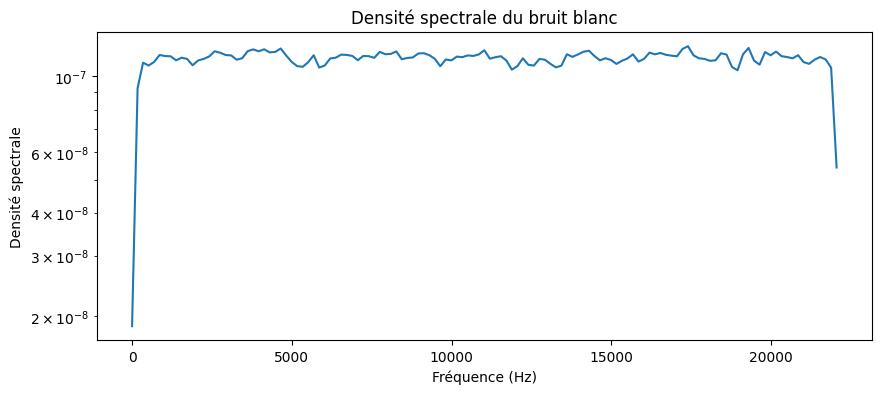

In [ ]:
#  Étape 4 : Ajouter un bruit blanc
noise = np.random.normal(0, 0.05, audio.shape)
audio_noisy = audio + noise  # Ajouter le bruit

#  Écouter le bruit blanc
print(" Écouter le bruit blanc")
display(Audio(noise, rate=fs))

#  Afficher la DSP du bruit
frequencies, power_spectrum_noise = signal.welch(noise, fs)
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power_spectrum_noise)
plt.title("Densité spectrale du bruit blanc")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale")
plt.show()

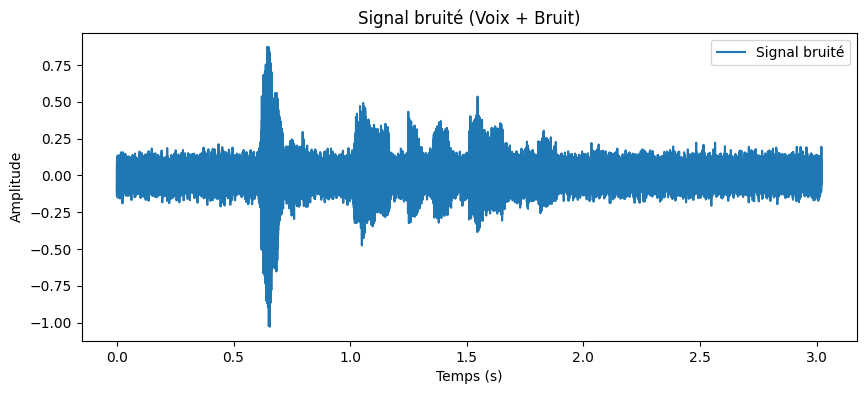

🎧 Écouter le signal bruité


In [ ]:
#  Étape 5 : Afficher le signal bruité
plt.figure(figsize=(10, 4))
plt.plot(time, audio_noisy, label="Signal bruité")
plt.title("Signal bruité (Voix + Bruit)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
#  Écouter le signal bruité
print(" Écouter le signal bruité")
display(Audio(audio_noisy, rate=fs))

In [ ]:
# Etape 6 : Création et application du filtre
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    shannon = 0.5 * fs  # la moitié de la fréquence d’échantillonnage sinon il y'a chevauchement d'après le théorème de shannon
    normal_cutoff = cutoff / shannon  # Normalise la fréquence de coupure pour la rendre compatible avec butter().
    b, a = butter(order, normal_cutoff, btype='low', analog=False) #Crée un filtre numérique Butterworth passe-bas
    filtered_data = filtfilt(b, a, data)
    return filtered_data #applique le filtre deux fois (filtfilt()) pour éviter le décalage de phase.

# Application du filtre
cutoff_freq = 8000  # Hz
filtered_signal = butter_lowpass_filter(audio_noisy , cutoff_freq, fs)

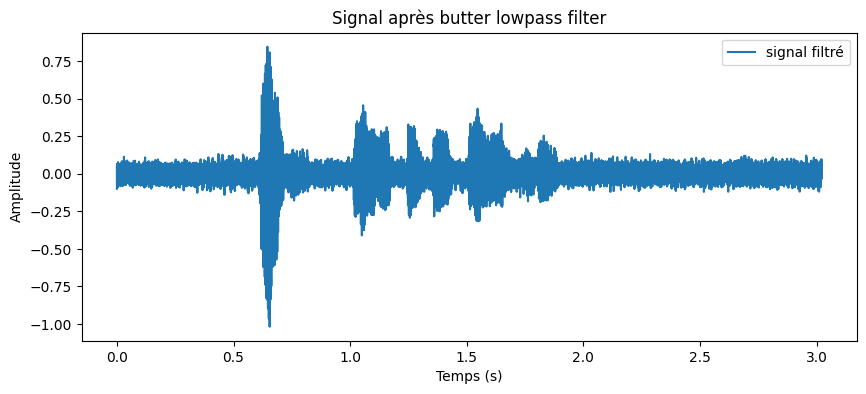

🎧 Écouter le signal filtré


In [ ]:
#  Étape 7 : Afficher le signal filtré
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_signal, label="signal filtré")
plt.title("Signal après butter lowpass filter")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
print(f"Écouter le signal filtré")
display(Audio(filtered_signal, rate=fs))


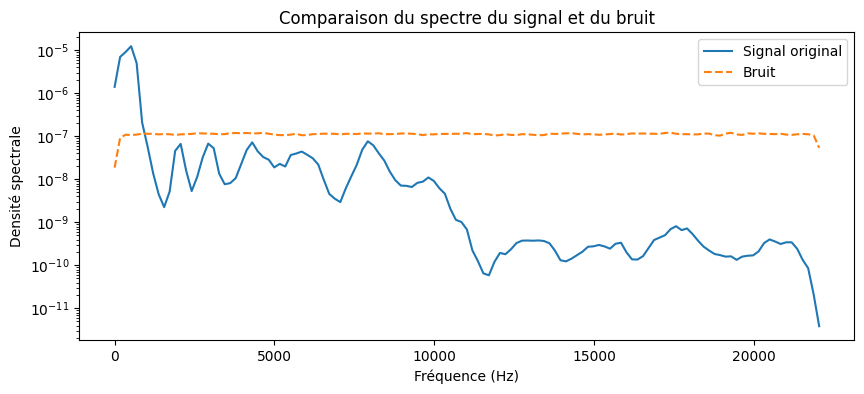

In [ ]:
#Comparaison Signal vs Bruit
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power_spectrum, label="Signal original")
plt.semilogy(frequencies, power_spectrum_noise, label="Bruit", linestyle="dashed")
plt.title("Comparaison du spectre du signal et du bruit")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale")
plt.legend()
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist  # Normalisation
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Application du filtre
cutoff_freq = 5000  # Hz
filtered_signal = butter_lowpass_filter(audio_noisy , cutoff_freq, fs)

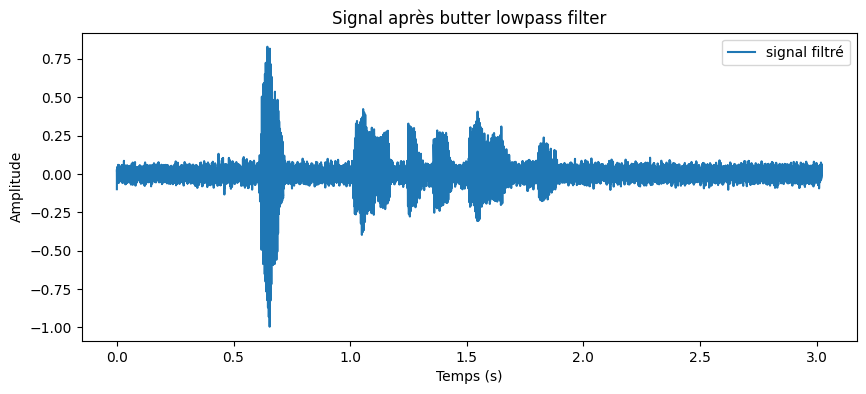

🎧 Écouter le signal filtré


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_signal, label="signal filtré")
plt.title("Signal après butter lowpass filter")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
print(f" Écouter le signal filtré")
display(Audio(filtered_signal, rate=fs))